<a href="https://colab.research.google.com/github/omidghavibazoo/demo-project/blob/main/RRBs_%25change.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analysis of the impact of discontinued Real Return Bonds (RRBs) on nominal bond yields.
---
#### Omid Ghavibazoo, Research Associate, Global Risk Institute



# Importing Data

In [ ]:
# Import Packages
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(123)

!pip install -q condacolab
import condacolab
condacolab.install()

✨🍰✨ Everything looks OK!


In [ ]:
!conda install -c conda-forge pmdarima -y

Channels:
 - conda-forge
Platform: linux-64
Solving environment: | / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - pmdarima


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2025.1.31  |       hbcca054_0         154 KB  conda-forge
    certifi-2025.1.31          |     pyhd8ed1ab_0         159 KB  conda-forge
    conda-24.11.3              |  py311h38be061_0         1.1 MB  conda-forge
    cython-3.0.12              |  py311ha3e34f5_0         3.6 MB  conda-forge
    joblib-1.4.2               |     pyhd8ed1ab_1         215 KB  conda-forge
    libblas-3.9.0              |31_h59b9bed_openblas          16 KB  conda-forge
    libcblas-3.9.0             |31_he106b2a_openblas          16 KB  conda-forge
    libgfortran-14.2.0         |       h69a702a_2          52 KB  conda-forge
    libgfortran5-14.2.0        |       hf1ad2

In [ ]:
# Import the Excel file
from google.colab import files
uploaded = files.upload()

Saving Data.xlsx to Data (2).xlsx


In [ ]:
# Extract the sheet of yields
df = pd.read_excel('Data.xlsx', sheet_name='Cleaned')
df['Date'] = pd.to_datetime(df['Date'])
print(df.tail()) # Print the first few rows of the DataFrame to verify import.

           Date  TBills-1m  TBills-2m  TBills-3m  TBills-6m  TBills-1y  \
1489 2022-12-22       4.14       4.18       4.19       4.40       4.42   
1490 2022-12-23       4.09       4.11       4.20       4.35       4.45   
1491 2022-12-28       4.13       4.19       4.25       4.36       4.51   
1492 2022-12-29       4.13       4.12       4.25       4.44       4.47   
1493 2022-12-30       4.14       4.20       4.23       4.47       4.52   

      BondYields-2y  BondYields-3y  BondYields-5y  BondYields-7y  \
1489           3.82           3.57           3.15           3.00   
1490           3.93           3.68           3.25           3.10   
1491           4.02           3.77           3.37           3.23   
1492           4.01           3.77           3.37           3.22   
1493           4.06           3.82           3.41           3.27   

      BondYields-10y  BondYields-Long  
1489            3.08             3.09  
1490            3.17             3.16  
1491            3.29      

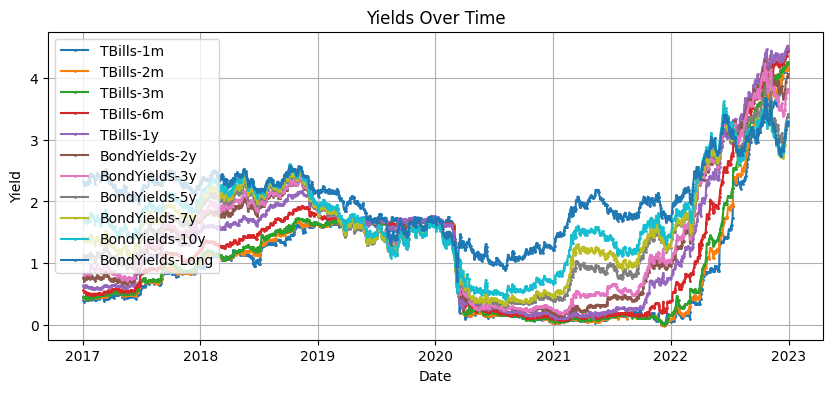

In [ ]:
# Plotting each column (1m to long) vs Date for yields
plt.figure(figsize=(10, 4))
for col in df.columns[1:]:  # Skip 'Date' column
    plt.plot(df['Date'], df[col], marker='.',markersize=2, label=col)

plt.xlabel('Date')
plt.ylabel('Yield')
plt.title('Yields Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Extract the sheet of percentage changes in yields
df1 = pd.read_excel('Data.xlsx', sheet_name='%Changes')
df1['Date'] = pd.to_datetime(df['Date'])
print(df1.head()) # Print the first few rows of the DataFrame to verify import.

        Date  TBills-1m-Chng  TBills-2m-Chng  TBills-3m-Chng  TBills-6m-Chng  \
0 2017-01-03       -2.500000       -2.222222       -2.173913       -1.785714   
1 2017-01-04       -2.564103        0.000000       -2.222222       -3.636364   
2 2017-01-05       10.526316       -2.272727        0.000000        1.886792   
3 2017-01-06       -2.380952       -2.325581        2.272727       -1.851852   
4 2017-01-09        0.000000        2.380952        4.444444        1.886792   

   TBills-1y-Chng  BondYields-2y-Chng  BondYields-3y-Chng  BondYields-5y-Chng  \
0       -3.125000           -2.597403           -2.325581           -2.631579   
1       -1.612903           -4.000000           -3.571429           -3.603604   
2        3.278689            5.555556            3.703704            4.672897   
3       -1.587302           -1.315789           -1.190476           -1.785714   
4        4.838710            0.000000            0.000000           -0.909091   

   BondYields-7y-Chng  BondYield

In [ ]:
# Get the number of rows and columns
print(df1.shape[0])
print(df1.shape[1])

1493
12


In [ ]:
# Specify the cutoff date
cutoff_date = pd.to_datetime('October 24, 2022')
df1_filtered = df1[df1['Date'] <= cutoff_date]   # Filter the DataFrame
print(df1_filtered.tail())   # Print or further process df_filtered

# Original dataset
print(f'Number of rows are: {df1.shape[0]}')
print(f'Number of columns are: {df1.shape[1]}')
# Filtered dataset
print(f'Number of rows are: {df1_filtered.shape[0]}')
print(f'Number of columns are: {df1_filtered.shape[1]}')

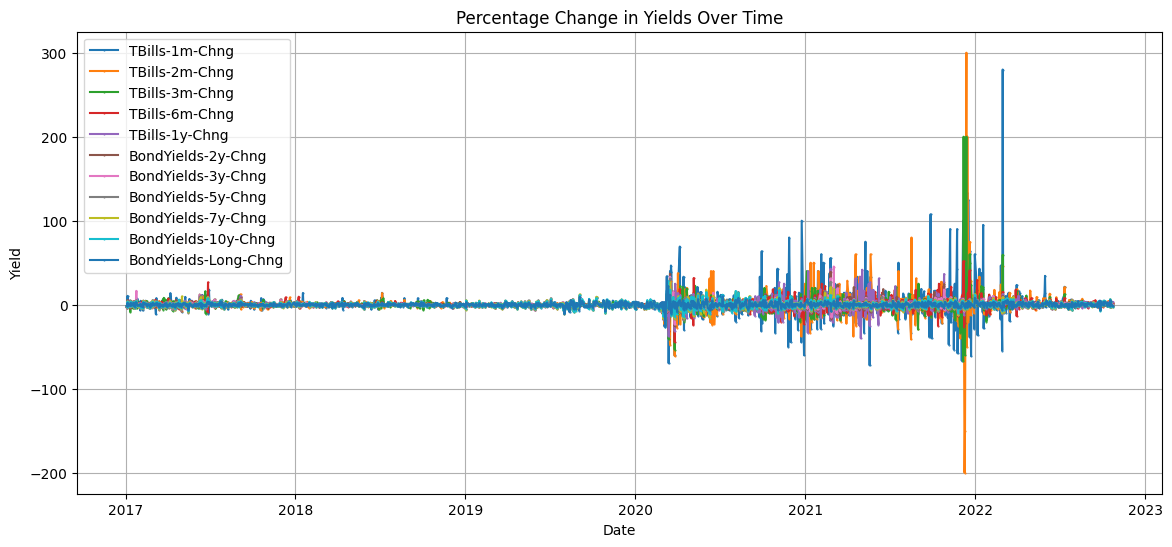

In [ ]:
# Plotting each column (1m to long) vs Date
plt.figure(figsize=(14, 6))
for col in df1_filtered.columns[1:]:  # Skip 'Date' column
    plt.plot(df1_filtered['Date'], df1_filtered[col], marker='.',markersize=1, label=col)

plt.xlabel('Date')
plt.ylabel('Yield')
plt.title('Percentage Change in Yields Over Time')
plt.legend()
plt.grid(True)
plt.show()

# PCA Analysis

In [ ]:
# Run principal component analysis on the data
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Select numerical features for PCA
features = ['TBills-1m-Chng', 'TBills-2m-Chng','TBills-3m-Chng', 'TBills-6m-Chng','TBills-1y-Chng','BondYields-2y-Chng',
            'BondYields-3y-Chng','BondYields-5y-Chng','BondYields-7y-Chng','BondYields-10y-Chng','BondYields-Long-Chng']
x = df1_filtered.loc[:, features].values

# Normalize data using StandardScaler
x = StandardScaler().fit_transform(x)

In [ ]:
# Find NaN values in the dataframe
nan_locations = np.where(np.isnan(x))

# Print the row and column indices where NaN values are located
print("NaN locations (row, column):")
for row, col in zip(*nan_locations):
    print(f"Row: {row}, Column: {col}")

NaN locations (row, column):


Text(0.5, 1.0, 'Explained Variance per Component')

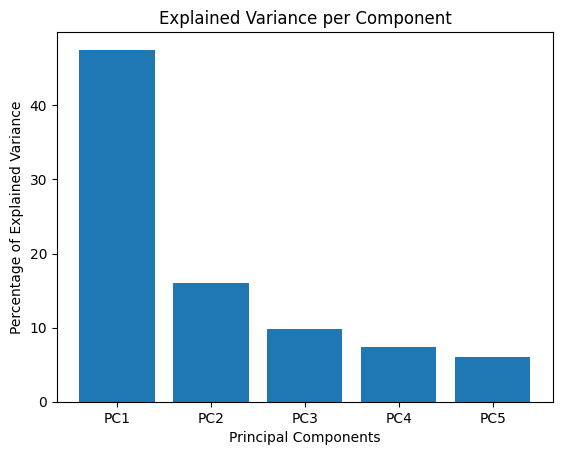

In [ ]:
# Apply PCA with 5 components
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(x)
#principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5'])

per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
#plt.plot(x=range(1, len(per_var)+1), pca.explained_variance_ratio_.cumsum()*100)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Components')
plt.title('Explained Variance per Component')

In [ ]:
print(pca.explained_variance_ratio_)

[0.47487744 0.15991582 0.09751285 0.07430387 0.06098026]


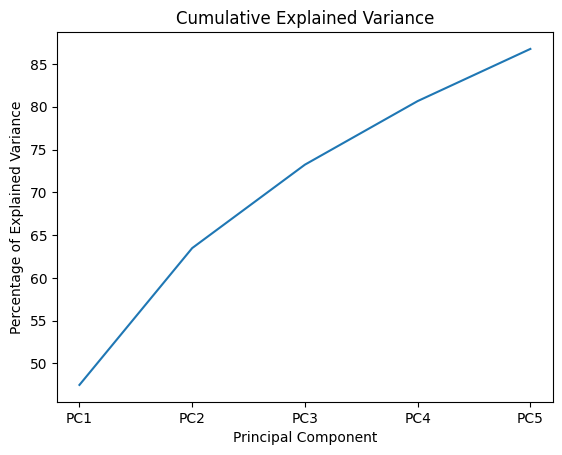

In [ ]:
plt.plot(labels, pca.explained_variance_ratio_.cumsum()*100)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Cumulative Explained Variance');

In [ ]:
# Extract the first three principal components
first_three_pcs = principalComponents[:, :3]
# Print or further process the extracted components
first_three_pcs

array([[-1.61986814, -0.390864  , -0.26293105],
       [-2.28657629, -0.28088682, -0.28269706],
       [ 2.65882112, -0.08580499,  0.31711908],
       ...,
       [-1.429618  ,  0.16926181,  0.09613811],
       [-0.48634827,  0.07592315, -0.26154604],
       [-0.91385774,  0.64494734,  0.85390145]])

In [ ]:
# Create a DataFrame with dates and the first three principal components
df_pca10 = pd.DataFrame({'BondYields-10y-Chng': df1_filtered['BondYields-10y-Chng'],
                       'PC1': first_three_pcs[:, 0],
                       'PC2': first_three_pcs[:, 1],
                       'PC3': first_three_pcs[:, 2]})
print(df_pca10)

      BondYields-10y-Chng       PC1       PC2       PC3
0               -1.724138 -1.619868 -0.390864 -0.262931
1               -2.339181 -2.286576 -0.280887 -0.282697
2                3.592814  2.658821 -0.085805  0.317119
3               -2.312139 -1.212932 -0.118982 -0.162802
4                0.000000 -0.192180  0.679378  0.576160
...                   ...       ...       ...       ...
1443             6.287425  3.631561 -0.483713 -0.678614
1444             3.098592  2.148314 -0.274822 -0.342586
1445            -1.639344 -1.429618  0.169262  0.096138
1446            -0.833333 -0.486348  0.075923 -0.261546
1447            -2.521008 -0.913858  0.644947  0.853901

[1448 rows x 4 columns]


# Regressions to predict changes

# Use ARIMA

In [ ]:
# !pip install -q condacolab
# import condacolab
# condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/download/24.11.2-1_colab/Miniforge3-colab-24.11.2-1_colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:12
🔁 Restarting kernel...


In [ ]:
#  !conda install -c conda-forge pmdarima -y

Channels:
 - conda-forge
Platform: linux-64
Solving environment: - \ | / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - pmdarima


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2025.1.31  |       hbcca054_0         154 KB  conda-forge
    certifi-2025.1.31          |     pyhd8ed1ab_0         159 KB  conda-forge
    conda-24.11.3              |  py311h38be061_0         1.1 MB  conda-forge
    cython-3.0.12              |  py311ha3e34f5_0         3.6 MB  conda-forge
    joblib-1.4.2               |     pyhd8ed1ab_1         215 KB  conda-forge
    libblas-3.9.0              |31_h59b9bed_openblas          16 KB  conda-forge
    libcblas-3.9.0             |31_he106b2a_openblas          16 KB  conda-forge
    libgfortran-14.2.0         |       h69a702a_2          52 KB  conda-forge
    libgfortran5-14.2.0        |       hf

In [ ]:
from sklearn.linear_model import LinearRegression
from pmdarima import auto_arima

In [ ]:
print(df_pca10)

      BondYields-10y-Chng       PC1       PC2       PC3
0               -1.724138 -1.619868 -0.390864 -0.262931
1               -2.339181 -2.286576 -0.280887 -0.282697
2                3.592814  2.658821 -0.085805  0.317119
3               -2.312139 -1.212932 -0.118982 -0.162802
4                0.000000 -0.192180  0.679378  0.576160
...                   ...       ...       ...       ...
1443             6.287425  3.631561 -0.483713 -0.678614
1444             3.098592  2.148314 -0.274822 -0.342586
1445            -1.639344 -1.429618  0.169262  0.096138
1446            -0.833333 -0.486348  0.075923 -0.261546
1447            -2.521008 -0.913858  0.644947  0.853901

[1448 rows x 4 columns]


In [ ]:
# --- Step 1: Forecast PCA Components using auto_arima ---
pca_orders = {}
forecast_pcas = []

for col in ['PC1', 'PC2', 'PC3']:
    series = df_pca10[col]

    # Automatically select best ARIMA order
    model = auto_arima(
        series,
        seasonal=False,     # PCA is not seasonal
        stepwise=True,
        suppress_warnings=True,
        error_action='ignore',
        max_p=5, max_q=5,   # limit complexity
        max_order=None      # unrestricted if you want more flexibility
    )
     # Store or print the selected ARIMA order
    pca_orders[col] = model.order
    print(f"Best ARIMA order for {col}: {model.order}")

    # Forecast next 13 steps
    forecast = model.predict(n_periods=13)
    forecast_pcas.append(forecast)

/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Best ARIMA order for PC1: (5, 1, 0)


/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Best ARIMA order for PC2: (5, 1, 0)


/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Best ARIMA order for PC3: (1, 0, 2)


/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
# Stack forecasts: shape (13 days, 3 PCA components)
pca_forecast_array = np.column_stack(forecast_pcas)

In [ ]:
# --- Step 2: Train regression model to predict % change in 10Y yield ---
X = df_pca10[['PC1', 'PC2', 'PC3']]
y = df_pca10['BondYields-10y-Chng']
reg_model = LinearRegression()
reg_model.fit(X, y)

LinearRegression()

In [ ]:
# --- Step 3: Predict % change in 10Y yield using predicted PCA values ---
yield_predictions = reg_model.predict(pca_forecast_array)

/usr/local/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
# --- Step 4: Combine results into DataFrame ---
results = pd.DataFrame({
    'Day': [f'Day {i+1}' for i in range(13)],
    'PC1': pca_forecast_array[:, 0],
    'PC2': pca_forecast_array[:, 1],
    'PC3': pca_forecast_array[:, 2],
    'Predicted % Change in 10Y Yield': yield_predictions
})

print(results)

       Day       PC1       PC2       PC3  Predicted % Change in 10Y Yield
0    Day 1  0.333884  0.022100 -0.226256                         0.719137
1    Day 2  0.572780  0.036878  0.015172                         0.900165
2    Day 3  0.030344  0.055980  0.011852                         0.121004
3    Day 4 -0.274038  0.249935  0.009259                        -0.394330
4    Day 5 -0.185039  0.154578  0.007234                        -0.225312
5    Day 6 -0.070779  0.201998  0.005651                        -0.081802
6    Day 7  0.082501  0.096711  0.004415                         0.182587
7    Day 8  0.030145  0.147759  0.003449                         0.086690
8    Day 9 -0.062270  0.142723  0.002694                        -0.042379
9   Day 10 -0.083001  0.179534  0.002105                        -0.087338
10  Day 11 -0.054222  0.144433  0.001644                        -0.030978
11  Day 12 -0.024110  0.155389  0.001285                         0.007468
12  Day 13 -0.016377  0.139506  0.0010

In [ ]:
print(df1_filtered)


           Date  TBills-1m-Chng  TBills-2m-Chng  TBills-3m-Chng  \
0    2017-01-03       -2.500000       -2.222222       -2.173913   
1    2017-01-04       -2.564103        0.000000       -2.222222   
2    2017-01-05       10.526316       -2.272727        0.000000   
3    2017-01-06       -2.380952       -2.325581        2.272727   
4    2017-01-09        0.000000        2.380952        4.444444   
...         ...             ...             ...             ...   
1443 2022-10-18        4.360465        2.472527        1.041667   
1444 2022-10-19        2.506964        1.072386        1.030928   
1445 2022-10-20        0.815217        0.000000       -1.020408   
1446 2022-10-21        2.425876        1.326260        2.061856   
1447 2022-10-24       -0.263158        1.832461        1.262626   

      TBills-6m-Chng  TBills-1y-Chng  BondYields-2y-Chng  BondYields-3y-Chng  \
0          -1.785714       -3.125000           -2.597403           -2.325581   
1          -3.636364       -1.61290

In [ ]:
cutoff_date = pd.to_datetime('January 4, 2017')
df2_filtered = df1[df1['Date'] <= cutoff_date]   # Filter the DataFrame
print(df2_filtered.tail())   # Print or further process df_filtered

        Date  TBills-1m-Chng  TBills-2m-Chng  TBills-3m-Chng  TBills-6m-Chng  \
0 2017-01-03       -2.500000       -2.222222       -2.173913       -1.785714   
1 2017-01-04       -2.564103        0.000000       -2.222222       -3.636364   

   TBills-1y-Chng  BondYields-2y-Chng  BondYields-3y-Chng  BondYields-5y-Chng  \
0       -3.125000           -2.597403           -2.325581           -2.631579   
1       -1.612903           -4.000000           -3.571429           -3.603604   

   BondYields-7y-Chng  BondYields-10y-Chng  BondYields-Long-Chng  
0           -1.408451            -1.724138             -1.287554  
1           -2.857143            -2.339181             -1.739130  


In [ ]:
print(df1_filtered.tail())

           Date  TBills-1m-Chng  TBills-2m-Chng  TBills-3m-Chng  \
1443 2022-10-18        4.360465        2.472527        1.041667   
1444 2022-10-19        2.506964        1.072386        1.030928   
1445 2022-10-20        0.815217        0.000000       -1.020408   
1446 2022-10-21        2.425876        1.326260        2.061856   
1447 2022-10-24       -0.263158        1.832461        1.262626   

      TBills-6m-Chng  TBills-1y-Chng  BondYields-2y-Chng  BondYields-3y-Chng  \
1443        1.711491        1.173709            3.980100            4.282116   
1444        1.201923        1.624130            2.392344            2.173913   
1445        0.712589        0.456621           -2.803738           -2.836879   
1446       -0.707547       -1.818182           -0.240385            0.000000   
1447        2.375297        3.240741            0.000000           -0.243309   

      BondYields-5y-Chng  BondYields-7y-Chng  BondYields-10y-Chng  \
1443            5.698006            6.268657   

In [ ]:
print(df1.tail())

           Date  TBills-1m-Chng  TBills-2m-Chng  TBills-3m-Chng  \
1488 2022-12-21        0.485437        1.456311        0.479616   
1489 2022-12-22       -1.207729       -1.674641        0.238663   
1490 2022-12-23        0.977995        1.946472        1.190476   
1491 2022-12-28        0.000000       -1.670644        0.000000   
1492 2022-12-29        0.242131        1.941748       -0.470588   

      TBills-6m-Chng  TBills-1y-Chng  BondYields-2y-Chng  BondYields-3y-Chng  \
1488        2.088167        0.683371            2.688172            2.586207   
1489       -1.136364        0.678733            2.879581            3.081232   
1490        0.229885        1.348315            2.290076            2.445652   
1491        1.834862       -0.886918           -0.248756            0.000000   
1492        0.675676        1.118568            1.246883            1.326260   

      BondYields-5y-Chng  BondYields-7y-Chng  BondYields-10y-Chng  \
1488            2.605863            2.739726   

In [ ]:
# Ensure Date column is datetime
df1['Date'] = pd.to_datetime(df1['Date'])

# Define your start and end dates
start_date = pd.to_datetime('2022-10-24')
end_date = pd.to_datetime('2022-11-03')

# Filter the rows between those dates
filtered333_df = df1[(df1['Date'] >= start_date) & (df1['Date'] <= end_date)].copy()

# View result
print(filtered333_df)

           Date  TBills-1m-Chng  TBills-2m-Chng  TBills-3m-Chng  \
1447 2022-10-24       -0.263158        1.832461        1.262626   
1448 2022-10-25       -2.110818       -3.084833       -3.740648   
1449 2022-10-26       -3.234501       -1.856764       -0.777202   
1450 2022-10-27       -0.835655       -1.351351        0.000000   
1451 2022-10-28        0.280899        2.191781        2.610966   
1452 2022-10-31        0.000000        0.268097       -0.508906   
1453 2022-11-01       -0.280112        0.000000        0.255754   
1454 2022-11-02       -0.561798       -0.534759        0.255102   
1455 2022-11-03        0.000000        1.612903        0.254453   

      TBills-6m-Chng  TBills-1y-Chng  BondYields-2y-Chng  BondYields-3y-Chng  \
1447        2.375297        3.240741            0.000000           -0.243309   
1448       -6.032483       -5.829596           -6.746988           -6.829268   
1449       -0.246914       -1.190476           -1.291990           -1.308901   
1450     

In [ ]:
from datetime import timedelta
df1['Date'] = pd.to_datetime(df1['Date'])

# Define start and end date
start_date = pd.to_datetime('2022-10-25')
end_date = pd.to_datetime('2022-11-10')

# Filter rows between the dates (inclusive)
df1_subset = df1[(df1['Date'] >= start_date) & (df1['Date'] <= end_date)].copy()

# View the result
print(df1_subset)

           Date  TBills-1m-Chng  TBills-2m-Chng  TBills-3m-Chng  \
1448 2022-10-25       -2.110818       -3.084833       -3.740648   
1449 2022-10-26       -3.234501       -1.856764       -0.777202   
1450 2022-10-27       -0.835655       -1.351351        0.000000   
1451 2022-10-28        0.280899        2.191781        2.610966   
1452 2022-10-31        0.000000        0.268097       -0.508906   
1453 2022-11-01       -0.280112        0.000000        0.255754   
1454 2022-11-02       -0.561798       -0.534759        0.255102   
1455 2022-11-03        0.000000        1.612903        0.254453   
1456 2022-11-04        0.847458       -0.529101       -1.015228   
1457 2022-11-07       -0.280112        0.265957        0.512821   
1458 2022-11-08        0.280899        1.061008        0.765306   
1459 2022-11-09       -1.680672       -1.312336       -1.772152   
1460 2022-11-10        1.139601       -0.265957        2.577320   

      TBills-6m-Chng  TBills-1y-Chng  BondYields-2y-Chng  Bon

In [ ]:
# Make a dataframe with predicted and Actual yields
print("Shape:", subset_df.shape)
print("Rows:", subset_df.shape[0])
print("Columns:", subset_df.shape[1])

Shape: (13, 1)
Rows: 13
Columns: 1


In [ ]:
# Extract the columns
col1 = df1_subset['Date']
col2 = df1_subset['BondYields-10y-Chng']
col3 = results['Predicted % Change in 10Y Yield']

# Combine into a new DataFrame
combined_df = pd.DataFrame({
    'Date': col1.values,
    'BondYields-10y-Chng': col2.values,
    'Predicted 10y-Chng': col3.values
})

# Preview the result
print(combined_df)

         Date  BondYields-10y-Chng  Predicted 10y-Chng
0  2022-10-25            -5.747126            0.719137
1  2022-10-26            -2.743902            0.900165
2  2022-10-27             1.253918            0.121004
3  2022-10-28             1.238390           -0.394330
4  2022-10-31            -0.611621           -0.225312
5  2022-11-01             2.153846           -0.081802
6  2022-11-02             2.710843            0.182587
7  2022-11-03             2.932551            0.086690
8  2022-11-04             2.849003           -0.042379
9  2022-11-07            -3.601108           -0.087338
10 2022-11-08            -2.298851           -0.030978
11 2022-11-09            -7.647059            0.007468
12 2022-11-10             0.636943            0.025478


In [ ]:
combined_df['Abnormal Return'] = combined_df['BondYields-10y-Chng'] - combined_df['Predicted 10y-Chng']

In [ ]:
CAR = combined_df['Abnormal Return'].sum()
print(f"Cumulative Abnormal Return (CAR): {CAR:.4f}%")

Cumulative Abnormal Return (CAR): -10.0546%


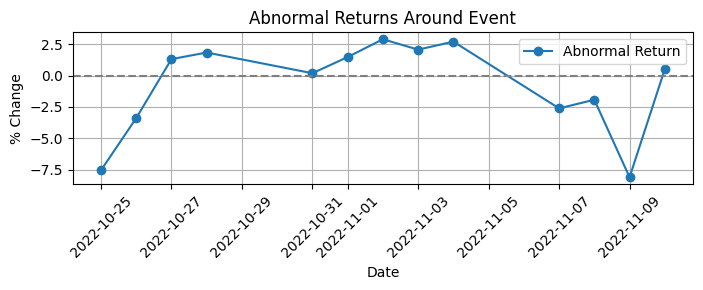

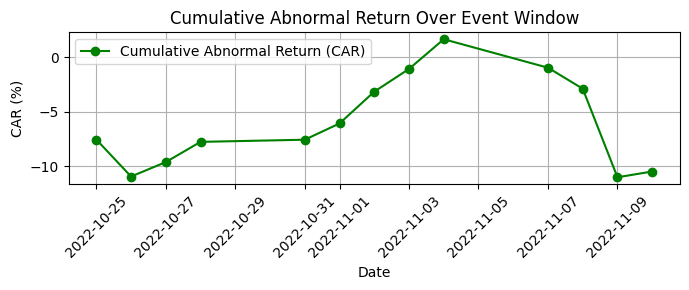

In [ ]:
import matplotlib.pyplot as plt

# Plot Abnormal Returns
plt.figure(figsize=(7, 3))
plt.plot(combined_df['Date'], combined_df['Abnormal Return'], marker='o', label='Abnormal Return')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Abnormal Returns Around Event')
plt.xlabel('Date')
plt.ylabel('% Change')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Optional: Cumulative AR (CAR) plot
combined_df['CAR'] = combined_df['Abnormal Return'].cumsum()
plt.figure(figsize=(7, 3))
plt.plot(combined_df['Date'], combined_df['CAR'], marker='o', label='Cumulative Abnormal Return (CAR)', color='green')
plt.title('Cumulative Abnormal Return Over Event Window')
plt.xlabel('Date')
plt.ylabel('CAR (%)')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import ttest_1samp

t_stat, p_value = ttest_1samp(combined_df['Abnormal Return'], 0)
print(f"t-statistic: {t_stat:.4f}, p-value: {p_value:.4f}")

t-statistic: -0.7741, p-value: 0.4538


In [ ]:
combined_df1 = combined_df.iloc[5:-4].copy()

# View the result
print(combined_df1)

        Date  BondYields-10y-Chng  Predicted 10y-Chng  Abnormal Return  \
5 2022-11-01             2.153846           -0.081802         2.235648   
6 2022-11-02             2.710843            0.182587         2.528256   
7 2022-11-03             2.932551            0.086690         2.845861   
8 2022-11-04             2.849003           -0.042379         2.891382   

        CAR  
5 -5.495356  
6 -2.967100  
7 -0.121238  
8  2.770144  


In [ ]:
t_stat, p_value = ttest_1samp(combined_df1['Abnormal Return'], 0)
print(f"t-statistic: {t_stat:.4f}, p-value: {p_value:.4f}")

t-statistic: 17.1653, p-value: 0.0004


Make the results for 5 year bond

In [ ]:
# Create a DataFrame with dates and the first three principal components
df_pca5 = pd.DataFrame({'BondYields-5y-Chng': df1_filtered['BondYields-5y-Chng'],
                       'PC1': first_three_pcs[:, 0],
                       'PC2': first_three_pcs[:, 1],
                       'PC3': first_three_pcs[:, 2]})
print(df_pca5)

      BondYields-5y-Chng       PC1       PC2       PC3
0              -2.631579 -1.619868 -0.390864 -0.262931
1              -3.603604 -2.286576 -0.280887 -0.282697
2               4.672897  2.658821 -0.085805  0.317119
3              -1.785714 -1.212932 -0.118982 -0.162802
4              -0.909091 -0.192180  0.679378  0.576160
...                  ...       ...       ...       ...
1443            5.698006  3.631561 -0.483713 -0.678614
1444            3.504043  2.148314 -0.274822 -0.342586
1445           -2.864583 -1.429618  0.169262  0.096138
1446           -0.536193 -0.486348  0.075923 -0.261546
1447           -1.347709 -0.913858  0.644947  0.853901

[1448 rows x 4 columns]


In [ ]:
# --- Step 2: Train regression model to predict % change in 10Y yield ---
X = df_pca5[['PC1', 'PC2', 'PC3']]
y = df_pca5['BondYields-5y-Chng']
reg_model = LinearRegression()
reg_model.fit(X, y)

LinearRegression()

In [ ]:
# --- Step 3: Predict % change in 5Y yield using predicted PCA values ---
yield_predictions = reg_model.predict(pca_forecast_array)

/usr/local/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
# --- Step 4: Combine results into DataFrame ---
results2 = pd.DataFrame({
    'Day': [f'Day {i+1}' for i in range(13)],
    'PC1': pca_forecast_array[:, 0],
    'PC2': pca_forecast_array[:, 1],
    'PC3': pca_forecast_array[:, 2],
    'Predicted % Change in 5Y Yield': yield_predictions
})

print(results2)

       Day       PC1       PC2       PC3  Predicted % Change in 5Y Yield
0    Day 1  0.333884  0.022100 -0.226256                        0.729839
1    Day 2  0.572780  0.036878  0.015172                        1.043407
2    Day 3  0.030344  0.055980  0.011852                        0.177240
3    Day 4 -0.274038  0.249935  0.009259                       -0.371961
4    Day 5 -0.185039  0.154578  0.007234                       -0.197325
5    Day 6 -0.070779  0.201998  0.005651                       -0.032087
6    Day 7  0.082501  0.096711  0.004415                        0.247746
7    Day 8  0.030145  0.147759  0.003449                        0.147294
8    Day 9 -0.062270  0.142723  0.002694                        0.002639
9   Day 10 -0.083001  0.179534  0.002105                       -0.042822
10  Day 11 -0.054222  0.144433  0.001644                        0.015075
11  Day 12 -0.024110  0.155389  0.001285                        0.059140
12  Day 13 -0.016377  0.139506  0.001004           

In [ ]:
# Make a dataframe with predicted and Actual yields
print("Shape:", subset_df.shape)
print("Rows:", subset_df.shape[0])
print("Columns:", subset_df.shape[1])


Shape: (13, 1)
Rows: 13
Columns: 1


In [ ]:
col1 = df1_subset['Date']
col2 = df1_subset['BondYields-5y-Chng']
col3 = results2['Predicted % Change in 5Y Yield']

# Combine into a new DataFrame
combined_df = pd.DataFrame({
    'Date': col1.values,
    'BondYields-5y-Chng': col2.values,
    'Predicted 5y-Chng': col3.values
})

# Preview the result
print(combined_df)

         Date  BondYields-5y-Chng  Predicted 5y-Chng
0  2022-10-25           -6.830601           0.729839
1  2022-10-26           -2.346041           1.043407
2  2022-10-27            1.501502           0.177240
3  2022-10-28            1.479290          -0.371961
4  2022-10-31            0.000000          -0.197325
5  2022-11-01            1.457726          -0.032087
6  2022-11-02            3.160920           0.247746
7  2022-11-03            2.228412           0.147294
8  2022-11-04            2.724796           0.002639
9  2022-11-07           -2.652520          -0.042822
10 2022-11-08           -1.907357           0.015075
11 2022-11-09           -8.055556           0.059140
12 2022-11-10            0.604230           0.076967


In [ ]:
combined_df['Abnormal Return'] = combined_df['BondYields-5y-Chng'] - combined_df['Predicted 5y-Chng']

In [ ]:
CAR = combined_df['Abnormal Return'].sum()
print(f"Cumulative Abnormal Return (CAR): {CAR:.4f}%")

Cumulative Abnormal Return (CAR): -10.4904%


In [ ]:
combined_df1 = combined_df.iloc[6:-4].copy()

# View the result
print(combined_df1)

        Date  BondYields-5y-Chng  Predicted 5y-Chng  Abnormal Return       CAR
6 2022-11-02            3.160920           0.247746         2.913174 -3.174064
7 2022-11-03            2.228412           0.147294         2.081119 -1.092946
8 2022-11-04            2.724796           0.002639         2.722156  1.629211


In [ ]:
t_stat, p_value = ttest_1samp(combined_df1['Abnormal Return'], 0)
print(f"t-statistic: {t_stat:.4f}, p-value: {p_value:.4f}")

t-statistic: 10.2219, p-value: 0.0094
